In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import kruskal

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('MHC_II_sm_features.csv')
df

,Unnamed: 0,allele,seq_num,start,end,length,core_peptide,peptide,iedb_aff,rank,protein_id,Number of Binding Alleles,protein_sequence,antigen_score,probable_type,aff_score,imm_score,Binding Alleles Score
0,48336,HLA-DRB1*10:01,2.0,32,46,15,LQFAYANRN,ICLLQFAYANRNRFL,10.56,0.795617,P0DTC5,62,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.6221,ANTIGEN,0.97888,0.432080,1.000000
1,1036,HLA-DRB1*01:01,1.0,896,910,15,FAMQMAYRF,IPFAMQMAYRFNGIG,8.35,0.795034,P0DTC2,47,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1.2828,ANTIGEN,0.98330,0.671794,0.754098
2,1046,HLA-DRB1*01:01,1.0,893,907,15,FAMQMAYRF,ALQIPFAMQMAYRFN,8.43,0.794921,P0DTC2,53,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1.0112,ANTIGEN,0.98314,0.573253,0.852459
3,1190,HLA-DRB1*01:01,2.0,32,46,15,LQFAYANRN,ICLLQFAYANRNRFL,14.41,0.793076,P0DTC5,62,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.6221,ANTIGEN,0.97118,0.432080,1.000000
4,10961,HLA-DRB3*03:01,2.0,34,48,15,FAYANRNRF,LLQFAYANRNRFLYI,14.30,0.790880,P0DTC5,59,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.7387,ANTIGEN,0.97140,0.474385,0.950820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29054,50101,HLA-DRB1*10:01,1.0,395,409,15,FVIRGDEVR,VYADSFVIRGDEVRQ,495.47,0.046392,P0DTC2,1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.2063,NON-ANTIGEN,0.00906,0.131522,0.000000
29055,3378,HLA-DRB1*01:01,1.0,358,372,15,CVADYSVLY,ISNCVADYSVLYNSA,496.70,0.045788,P0DTC2,5,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.3853,NON-ANTIGEN,0.00660,0.066577,0.065574
29056,12797,HLA-DRB3*03:01,1.0,93,107,15,EKSNIIRGW,ASTEKSNIIRGWIFG,490.68,0.044253,P0DTC2,5,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.4313,NON-ANTIGEN,0.01864,0.049888,0.065574
29057,45267,HLA-DRB1*12:01,1.0,123,137,15,VIKVCEFQF,ATNVVIKVCEFQFCN,499.33,0.038445,P0DTC2,1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.2514,NON-ANTIGEN,0.00134,0.115159,0.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29059 entries, 0 to 29058
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 29059 non-null  int64  
 1   allele                     29059 non-null  object 
 2   seq_num                    29059 non-null  float64
 3   start                      29059 non-null  int64  
 4   end                        29059 non-null  int64  
 5   length                     29059 non-null  int64  
 6   core_peptide               29059 non-null  object 
 7   peptide                    29059 non-null  object 
 8   iedb_aff                   29059 non-null  float64
 9   rank                       29059 non-null  float64
 10  protein_id                 29059 non-null  object 
 11  Number of Binding Alleles  29059 non-null  int64  
 12  protein_sequence           29059 non-null  object 
 13  antigen_score              29059 non-null  flo

In [4]:
df.isnull().sum()

Unnamed: 0                   0
allele                       0
seq_num                      0
start                        0
end                          0
length                       0
core_peptide                 0
peptide                      0
iedb_aff                     0
rank                         0
protein_id                   0
Number of Binding Alleles    0
protein_sequence             0
antigen_score                0
probable_type                0
aff_score                    0
imm_score                    0
Binding Alleles Score        0
dtype: int64

In [5]:
df['allele'].unique()

array(['HLA-DRB1*10:01', 'HLA-DRB1*01:01', 'HLA-DRB3*03:01',
       'HLA-DRB1*13:02', 'HLA-DRB1*13:01', 'HLA-DRB1*11:02',
       'HLA-DRB1*11:04', 'HLA-DRB1*07:01', 'HLA-DRB1*11:01',
       'HLA-DRB5*01:01', 'HLA-DPA1*01:03/DPB1*02:01', 'HLA-DRB1*13:03',
       'HLA-DRB1*01:02', 'HLA-DRB1*04:01', 'HLA-DRB1*14:01',
       'HLA-DRB1*14:06', 'HLA-DRB1*09:01', 'HLA-DRB1*15:01',
       'HLA-DRB1*04:04', 'HLA-DRB1*16:02', 'HLA-DPA1*01:03/DPB1*02:02',
       'HLA-DRB1*16:01', 'HLA-DRB1*04:10', 'HLA-DRB5*01:02',
       'HLA-DRB1*12:01', 'HLA-DRB1*04:05', 'HLA-DRB1*15:03',
       'HLA-DPA1*01:03/DPB1*04:01', 'HLA-DRB1*08:01', 'HLA-DRB4*01:03',
       'HLA-DRB1*14:02', 'HLA-DQA1*05:05/DQB1*03:01',
       'HLA-DQA1*05:01/DQB1*03:01', 'HLA-DRB3*02:02', 'HLA-DRB1*08:04',
       'HLA-DPA1*02:02/DPB1*01:01', 'HLA-DRB3*02:01', 'HLA-DRB1*14:05',
       'HLA-DRB1*08:02', 'HLA-DPA1*01:03/DPB1*01:01',
       'HLA-DQA1*06:01/DQB1*03:01', 'HLA-DQA1*01:03/DQB1*06:01',
       'HLA-DRB1*14:04', 'HLA-DRB1*15:02

In [6]:
len(df['allele'].unique())

82

There are 82 unique alleles

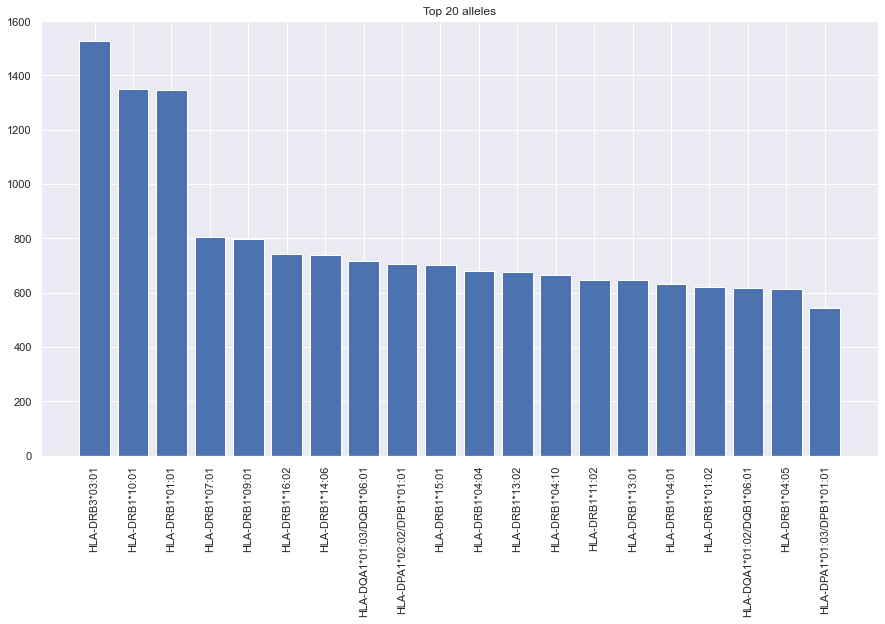

In [15]:
plt.figure(figsize = (15, 8))
#sns.countplot(x = 'allele', data = df)
al = df['allele'].value_counts()
plt.bar(al.index[:20], al.values[:20])
plt.title('Top 20 alleles')
plt.xticks(rotation = 90)
plt.show()

In [8]:
len(df['core_peptide'].unique())

743

There are 743 core peptides

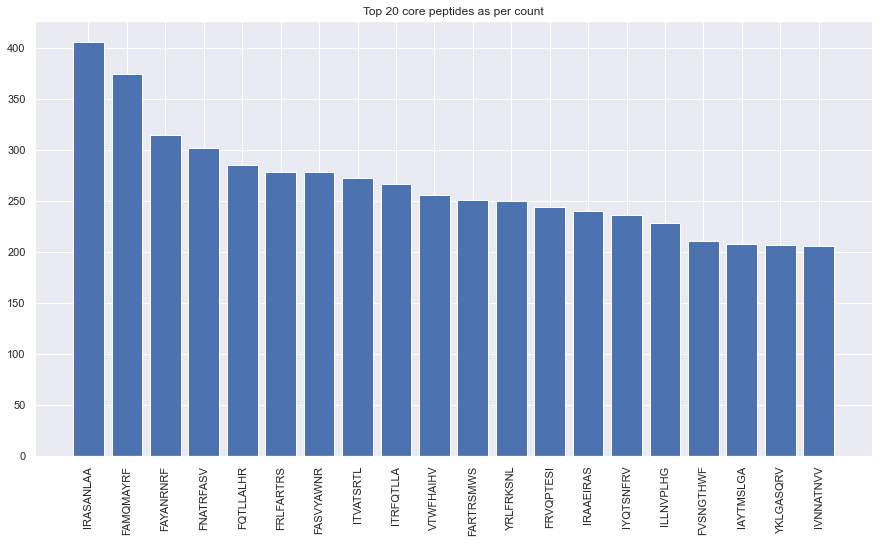

In [12]:
plt.figure(figsize = (15, 8))
cp = df['core_peptide'].value_counts()
plt.bar(cp.index[:20], cp.values[:20])
plt.title('Top 20 core peptides as per count')
plt.xticks(rotation = 90)
plt.show()

In [10]:
len(df['peptide'].unique())

2171

There are 2171 unique peptides

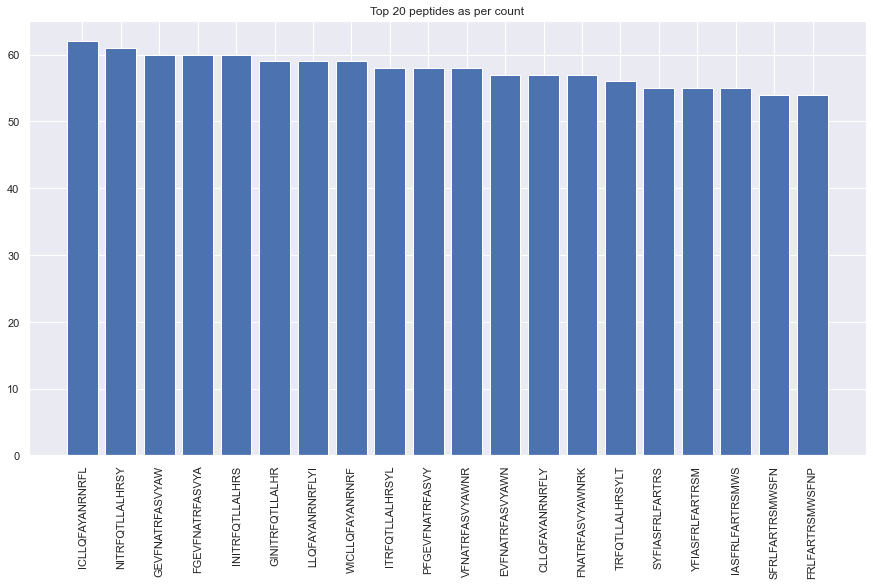

In [13]:
plt.figure(figsize = (15, 8))
p = df['peptide'].value_counts()
plt.bar(p.index[:20], p.values[:20])
plt.title('Top 20 peptides as per count')
plt.xticks(rotation = 90)
plt.show()

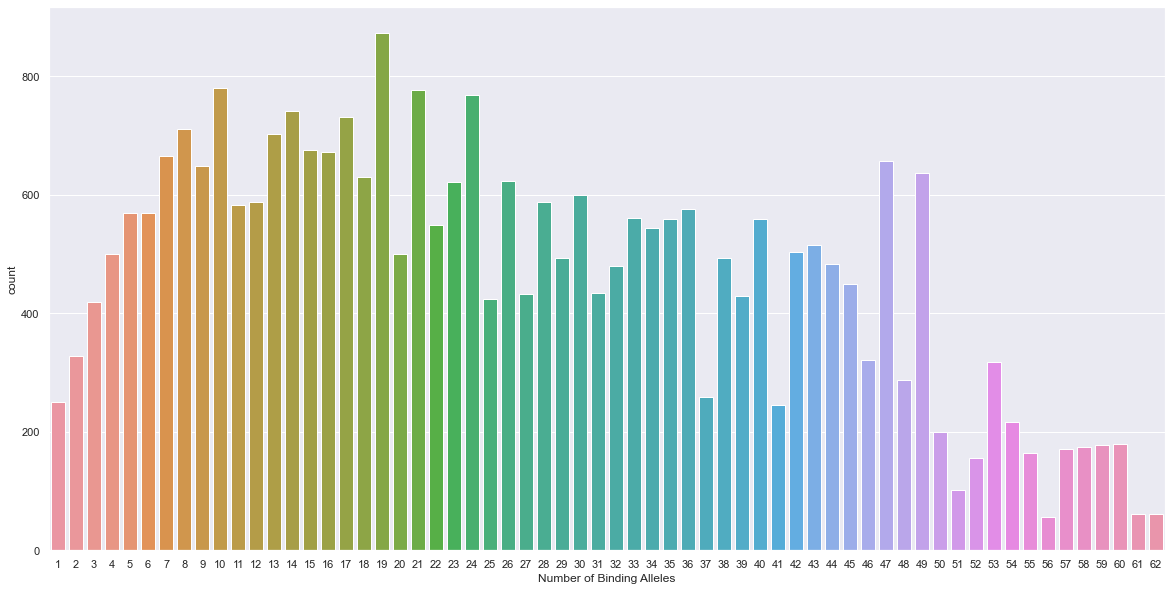

In [19]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Number of Binding Alleles', data = df)
plt.show()

Most of the peptides have 19, 10, 21, 24, 14 binding alleles

In [12]:
num_features = ['iedb_aff', 'antigen_score', 'rank', 
               'aff_score', 'imm_score', 'Binding Alleles Score']

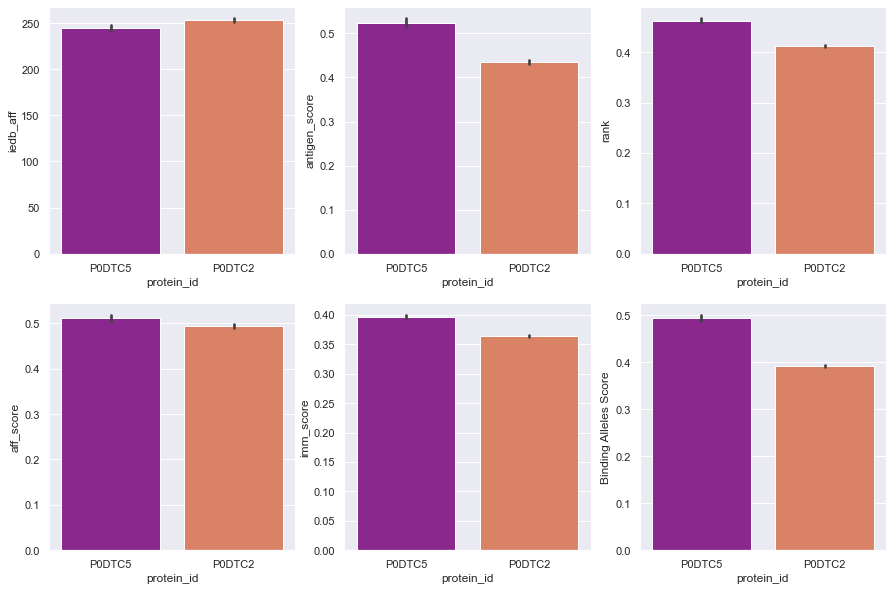

In [15]:
fig, axes = plt.subplots(2,3, figsize = (15, 10)) 

for param, ax in zip(num_features, axes.flatten()):
    sns.barplot(x ='protein_id', y =param, data = df,
            palette ='plasma', ax = ax)

P0DTC5 has more score than P0DTC2 for all parameters except iedb_aff

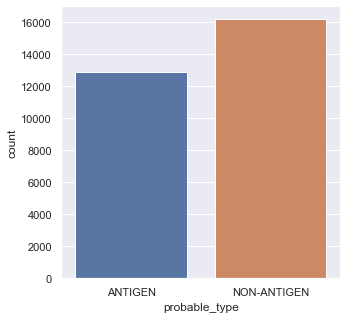

In [3]:
plt.figure(figsize = (5, 5))
sns.countplot(x = 'probable_type', data = df)
plt.show()

There are more non-antigens than antigens

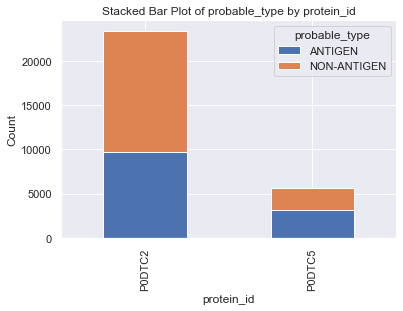

In [18]:
grouped = df.groupby(['protein_id', 'probable_type']).size().reset_index(name='count')
pivot = grouped.pivot(index='protein_id', columns='probable_type', values='count')
ax = pivot.plot(kind='bar', stacked=True)
ax.set_xlabel('protein_id')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Plot of probable_type by protein_id')

# Show the plot
plt.show()

P0DTC2 gives maximum peptide sequences but most of them are non-antigens

<AxesSubplot:xlabel='length', ylabel='count'>

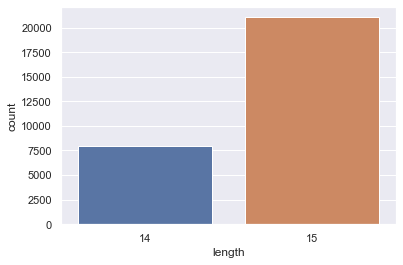

In [20]:
sns.countplot(x = 'length', data = df)

Most of the peptides have length 15

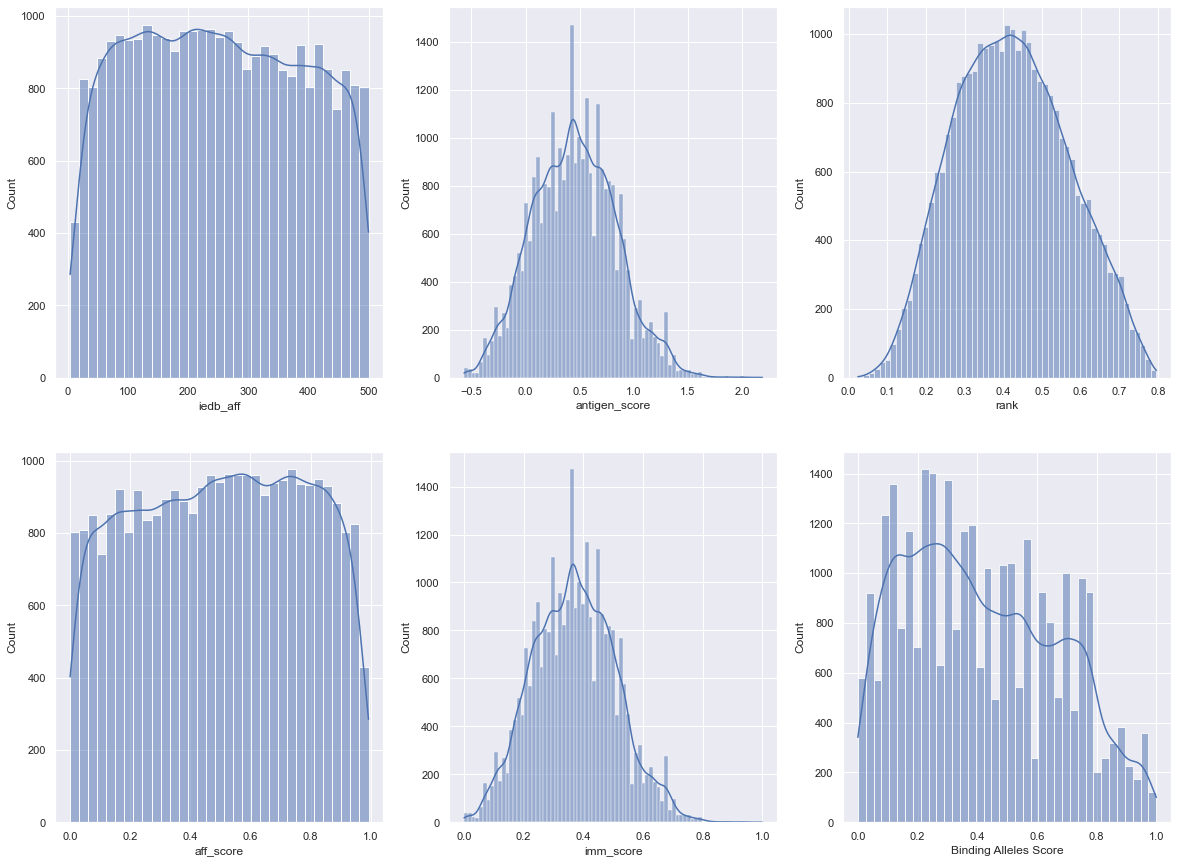

In [21]:
fig, axes = plt.subplots(2,3, figsize = (20, 15)) 

for param, ax in zip(num_features, axes.flatten()):
    sns.histplot(data=df, x=param, kde=True, ax = ax)

<AxesSubplot:>

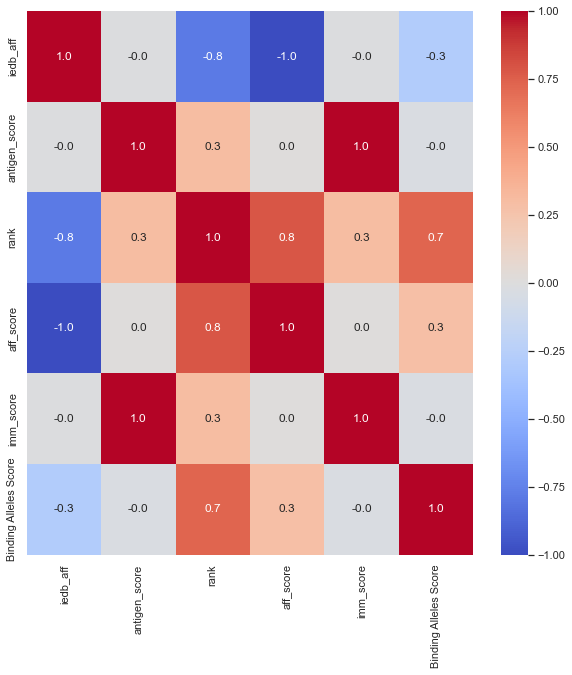

In [22]:
correlation = df[num_features].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(data = correlation, cmap = 'coolwarm', annot = True, fmt = '.1f')

The aff_score is a normalised score of iedb_aff. But there's negative correlation. The imm_score is a normalised version of antigen_score. The binding allele score is a median of number of binding alleles. The rank is a linear combination of aff_score, imm_score & binding alleles score but it is more correlated to aff_Score & binding alleles score

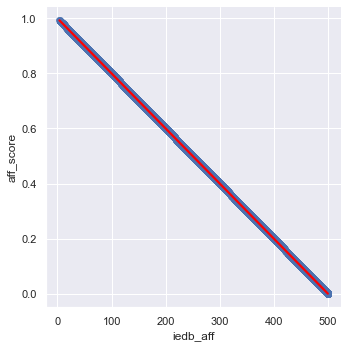

In [23]:
sns.lmplot(data = df, x ='iedb_aff', y = 'aff_score', line_kws={'color':'red'})

The aff_score & iedb_aff follows a negative linear correlation & that's how it should be since 500 is worst case & lower the values the better 

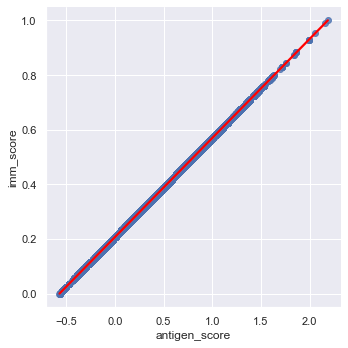

In [4]:
sns.lmplot(data = df, x ='antigen_score', y = 'imm_score', line_kws={'color':'red'})

The antigen_score & imm_score follows a positive linear correlation

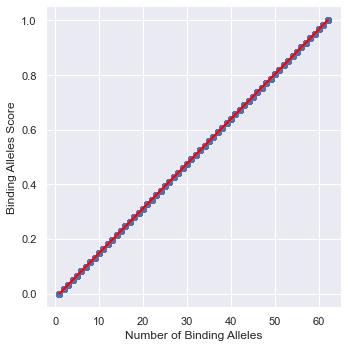

In [15]:
sns.lmplot(data = df, x ='Number of Binding Alleles', y = 'Binding Alleles Score', line_kws={'color':'red'})

The binding alleles score is directly proportional to the number of binding alleles

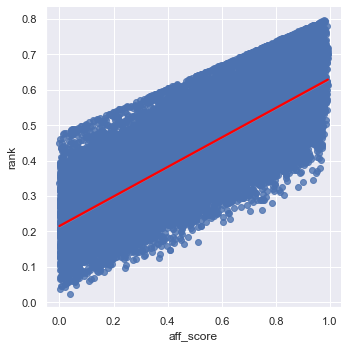

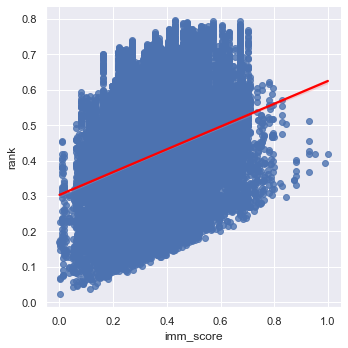

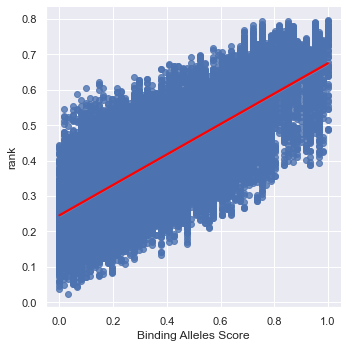

In [14]:
sns.lmplot(data = df, x ='aff_score', y = 'rank', line_kws={'color':'red'})
sns.lmplot(data = df, x ='imm_score', y = 'rank', line_kws={'color':'red'})
sns.lmplot(data = df, x ='Binding Alleles Score', y = 'rank', line_kws={'color':'red'})

The aff_score & binding alleles score are more linearly correlated to rank than imm_score

In [16]:
def top10_peptides_alleles_barGraph(parameter):
    af = df.groupby(['peptide', 'allele'])[parameter].mean().sort_values(ascending = False)[:10]
    li = []
    for i in range(len(af)):
        c = ' :: '.join(af.index[i])
        li.append(c)
    plt.figure(figsize=(10, 6))
    sns.barplot(li, af.values[:10])
    plt.title(f'Top 10 Peptides-Alleles with Highest {parameter}')
    plt.ylabel(parameter)
    plt.xticks(rotation=90)
    plt.show()
    

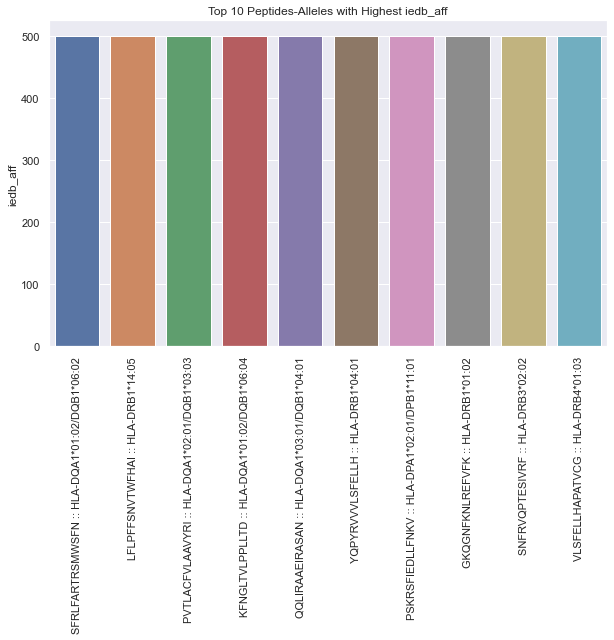

In [17]:
top10_peptides_alleles_barGraph('iedb_aff')

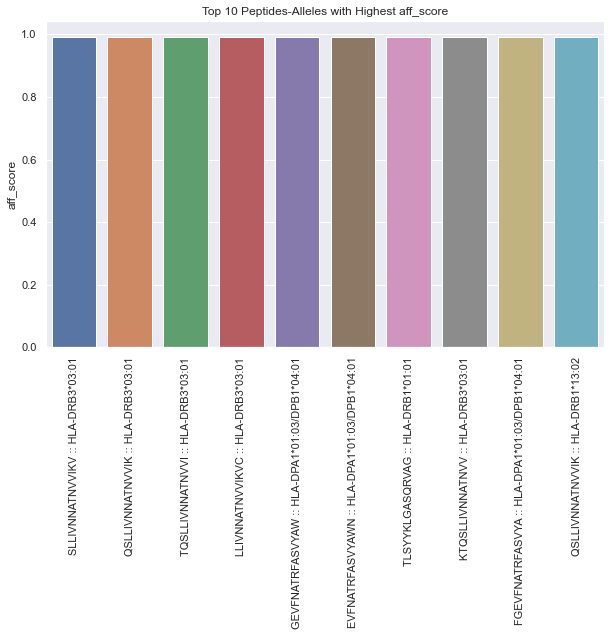

In [19]:
top10_peptides_alleles_barGraph('aff_score')

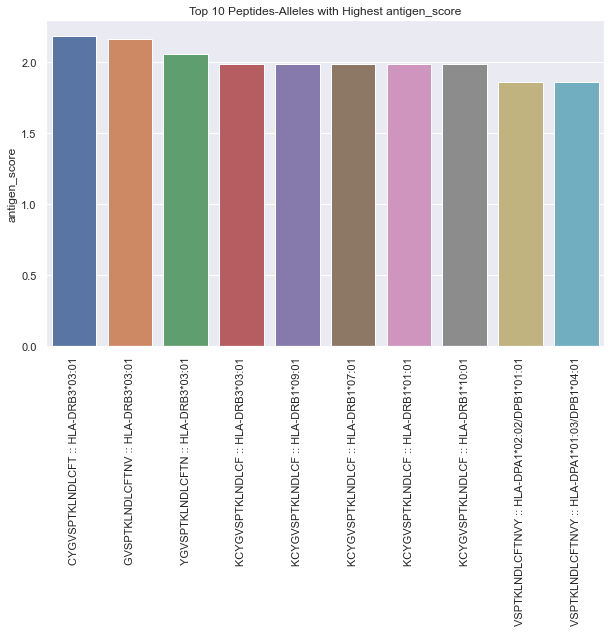

In [20]:
top10_peptides_alleles_barGraph('antigen_score')

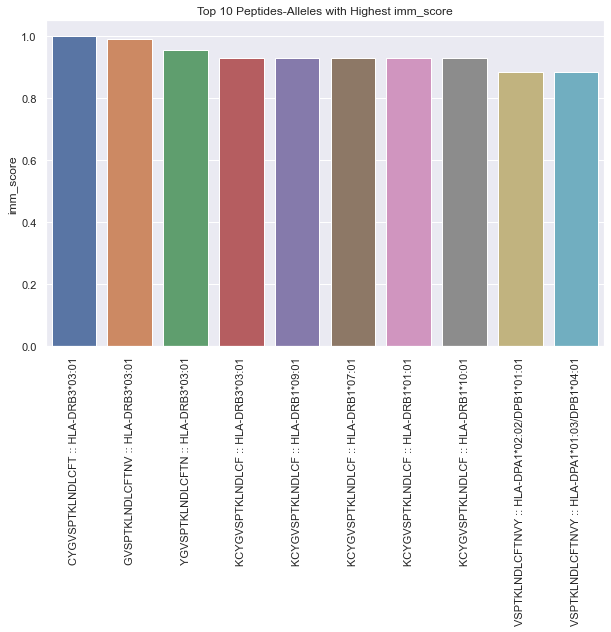

In [21]:
top10_peptides_alleles_barGraph('imm_score')

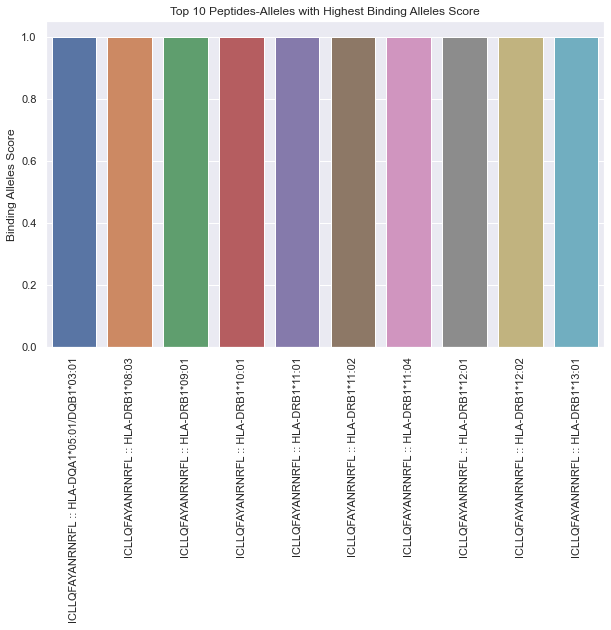

In [22]:
top10_peptides_alleles_barGraph('Binding Alleles Score')

In [3]:
def add_letters_count(dataframe):
    letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for char in letters:
        dataframe[char] = dataframe['peptide'].str.count(char)
    return dataframe

In [4]:
df = add_letters_count(df)
df.head()

,Unnamed: 0,allele,seq_num,start,end,length,core_peptide,peptide,iedb_aff,rank,...,Q,R,S,T,U,V,W,X,Y,Z
0,48336,HLA-DRB1*10:01,2.0,32,46,15,LQFAYANRN,ICLLQFAYANRNRFL,10.56,0.795617,...,1,2,0,0,0,0,0,0,1,0
1,1036,HLA-DRB1*01:01,1.0,896,910,15,FAMQMAYRF,IPFAMQMAYRFNGIG,8.35,0.795034,...,1,1,0,0,0,0,0,0,1,0
2,1046,HLA-DRB1*01:01,1.0,893,907,15,FAMQMAYRF,ALQIPFAMQMAYRFN,8.43,0.794921,...,2,1,0,0,0,0,0,0,1,0
3,1190,HLA-DRB1*01:01,2.0,32,46,15,LQFAYANRN,ICLLQFAYANRNRFL,14.41,0.793076,...,1,2,0,0,0,0,0,0,1,0
4,10961,HLA-DRB3*03:01,2.0,34,48,15,FAYANRNRF,LLQFAYANRNRFLYI,14.30,0.790880,...,1,2,0,0,0,0,0,0,2,0


In [5]:
features = df.loc[:, 'A':].columns
features

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='object')

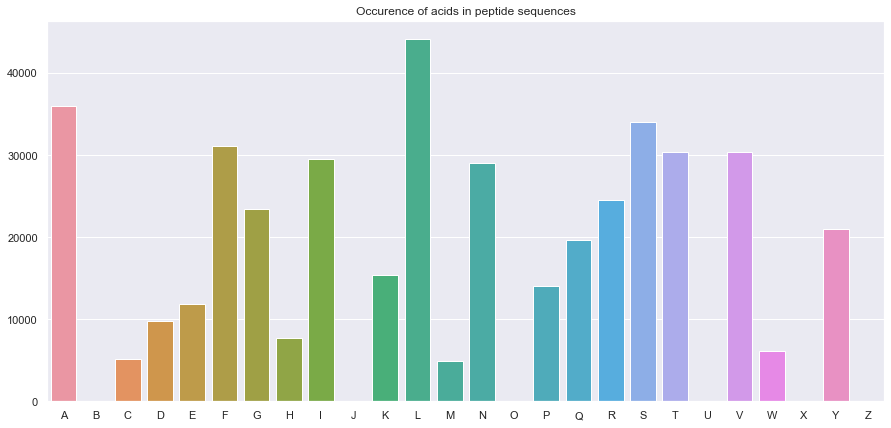

In [26]:
f = df[features].sum()
plt.figure(figsize = (15, 7))
sns.barplot(f.index, f.values)
plt.title('Occurence of acids in peptide sequences')
plt.show()

L, A, S, F, T, V are the most frequent amino acids in peptides. B, J, O, U, X, Z are absent as they are not amino acids

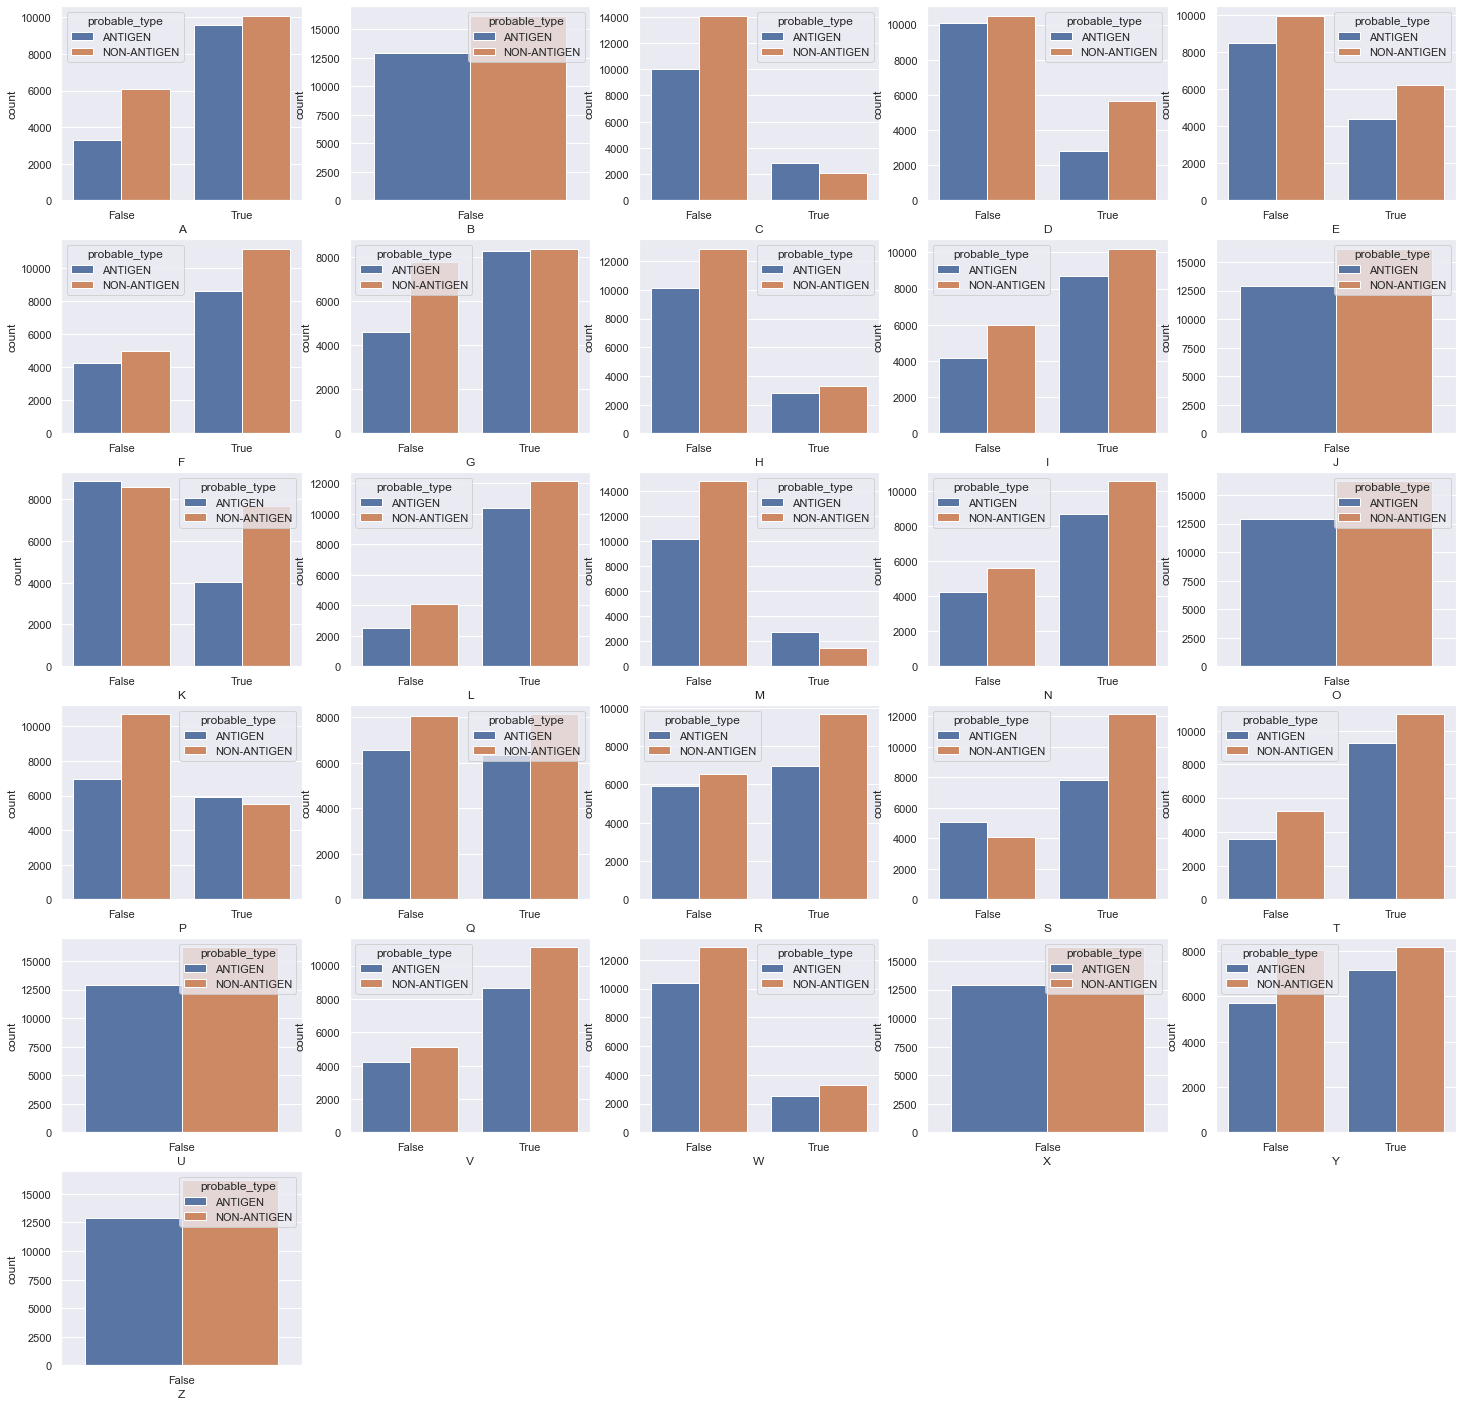

In [6]:
plt.figure(figsize = (25, 25))

for i in range(len(features)):
    plt.subplot(6,5, i+1)
    sns.countplot(x = df[features[i]]>0, hue = df['probable_type'])

**A**: if A is absent then mostly its non-antigen

**C**: if C is absent then mostly its non-antigen

**D**: if D is present then mostly its non-antigen

**E**: almost equal probability for antigen & non-antigen

**F**: if F is present then mostly its non-antigen

**G**: if G is absent then mostly its non-antigen

**H**: if H is absent then mostly its non-antigen

**I**: almost equal probability for antigen & non-antigen

**K**: if K is present then mostly its non-antigen

**L**: almost equal probability for antigen & non-antigen

**M**: if M is absent then mostly its non-antigen

**N**: almost equal probability for antigen & non-antigen

**P**: if P is absent then mostly its non-antigen

**Q**: almost equal probability for antigen & non-antigen

**R**: if R is present then mostly its non-antigen

**S**: if S is present then mostly its non-antigen

**T**: almost equal probability for antigen & non-antigen

**V**: if V is present then mostly its non-antigen

**W**: if W is absent then mostly its non-antigen

**Y**: if Y is absent then mostly its non-antigen